# AB testing Nedir?


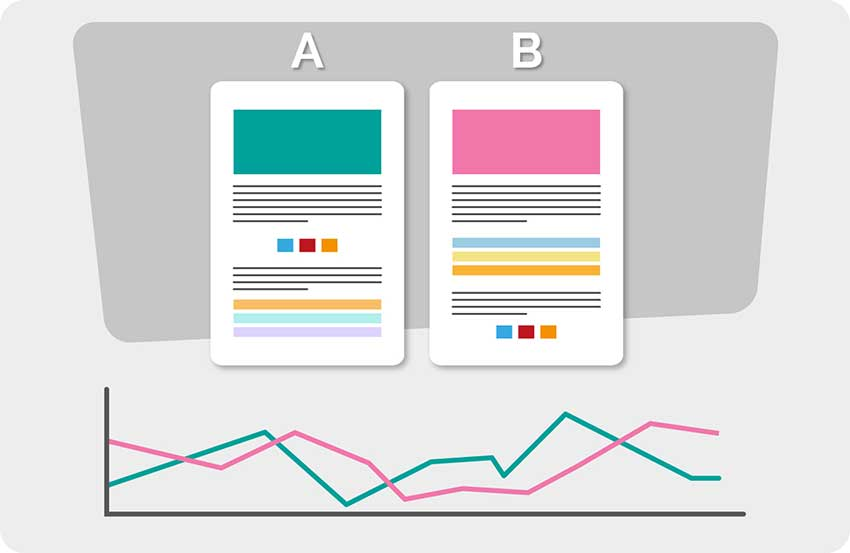

AB testleri veri bilimi alanında en çok kullanılan yöntemlerden birisidir.
AB den kasıt iki grubun iki özelliğin birbiri ile karşılaştırılmasıdır.
A bir grubu B bir grubu temsil etsin. 
Bu iki grup arasında farklılık olup olmadığı konusunda incelemeler yaptığımız kıyaslama işlemidir.
Bir sitenin tasarımı yapılmak istendiği zaman hangi tasarımın kullanıcılar tarafından daha dikkat çekici olduğu,
ilaç şirketleri için hangi ilacın daha faydalı olduğu ve piyasaya sürülmesi gerektiğine, yeni tasarlanmış bir ara yüzün eski arayüz
ile karşılaştırılıp kullanılmasına, buna göre yapılacak maliyetlerin harcamaların planlanması gibi arkasında uygulanacak işlemler için bir planlama 
arenasıdır AB Testleri.

Kadıköy ile Bakırköy şubeleri olan bir firmanın bütçe problemleri için şirketini
kapatmak istediğini düşünelim. 65,000 Tl ile 55,000 tl net karı olan bir şirketimiz
olsun bu şirketler için bu ortalama sağlam bir ortalama mı ? 
Ortalamalar kıyaslanıyor ama bu sağlıklımıdır? Sağlıklı olduğunu varsayalım. 
Bakırköyü kapatıyoruz diyebilir miyiz ? Bakırköyde o periyotta tadilat olabilir mevsimsel
sıkıntılar olabilir bu durum şans eseri mi yoksa gerçekten de böyle mi olduğu 
araştırılmalı. Tesadüfi mi gerçekleşmiş yoksa gerçekten bu durum böyle mi test
edilmeli. Bu fark şansa yer bırakmayacak kadar kesin bir fark mıdır?
Bu örnek aslında bir örneklemdir belli bir hatayı içinde barındırır.
istatistiksel hipotezler kurup test etmeliyiz.

# Senaryo
Bir fast food zinciri menüsüne yeni bir ürün eklemeyi planlıyor.
Ancak üç olası seçenek arasında hâlâ kararsızlar.
Yeni ürünü tanıtmak için pazarlama kampanyası yapıp hangi promosyonun satışlar üzerinde en büyük etkiye sahip olduğunu belirlemek için yeni ürün bölgelerdeki lokasyonlarda tanıtılmaktadır:

Rastgele seçilmiş birkaç pazara, her lokasyonda farklı bir promosyon uygulanmakta ve haftalık satışlar yapılmaktadır.

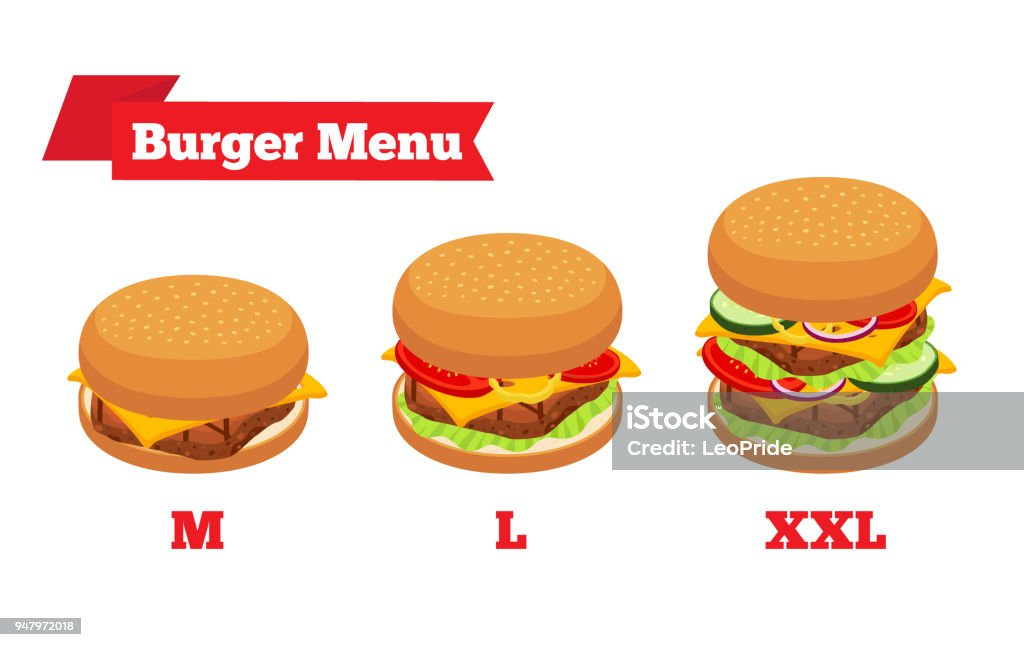

# Amaç
A/B testi sonuçlarını değerlendirin ve hangi pazarlama stratejisinin en iyi sonuç verdiğine karar verin

# Değişkenler
- MarketID: pazarın benzersiz tanımlayıcısı
- MarketSize: satışlara göre pazar alanının büyüklüğü
- LocationID: mağaza konumu 
- AgeOfStore: mağazanın yıl cinsinden yaşı
- Promosyon: Test edilen promosyonlar
- week: haftalar
- SalesInThousands: belirli bir LocationID, Promosyon ve hafta için satış tutarı

In [1]:
# gerekli kütüphanelerin yüklenmesi
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multicomp import MultiComparison

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
df = pd.read_csv("/kaggle/input/wa-marketing-campaign/WA_Marketing-Campaign.csv")
df

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73000
1,1,Medium,1,4,3,2,35.67000
2,1,Medium,1,4,3,3,29.03000
3,1,Medium,1,4,3,4,39.25000
4,1,Medium,2,5,2,1,27.81000
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34000
544,10,Large,920,14,2,1,50.20000
545,10,Large,920,14,2,2,45.75000
546,10,Large,920,14,2,3,44.29000


In [3]:
df.head(10) # ilk 10 gözlemi getir

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73000
1,1,Medium,1,4,3,2,35.67000
2,1,Medium,1,4,3,3,29.03000
3,1,Medium,1,4,3,4,39.25000
4,1,Medium,2,5,2,1,27.81000
5,1,Medium,2,5,2,2,34.67000
6,1,Medium,2,5,2,3,27.98000
7,1,Medium,2,5,2,4,27.72000
8,1,Medium,3,12,1,1,44.54000
9,1,Medium,3,12,1,2,37.94000


In [4]:
df.shape  

(548, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [6]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
MarketID,548.00000,5.71533,2.87700,1.00000,3.00000,6.00000,8.00000,10.00000
LocationID,548.00000,479.65693,287.97368,1.00000,216.00000,504.00000,708.00000,920.00000
AgeOfStore,548.00000,8.50365,6.63835,1.00000,4.00000,7.00000,12.00000,28.00000
Promotion,548.00000,2.02920,0.81073,1.00000,1.00000,2.00000,3.00000,3.00000
week,548.00000,2.50000,1.11906,1.00000,1.75000,2.50000,3.25000,4.00000
SalesInThousands,548.00000,53.46620,16.75522,17.34000,42.54500,50.20000,60.47750,99.65000


In [7]:
df.isnull().sum()     

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [8]:
# keşifçi veri analizi
df["AgeOfStore"].value_counts()


AgeOfStore
1     80
4     44
5     44
7     40
8     40
      ..
28     4
25     4
27     4
17     4
20     4
Name: count, Length: 25, dtype: int64

In [9]:
df["Promotion"].value_counts()

Promotion
3    188
2    188
1    172
Name: count, dtype: int64

In [10]:
df["MarketSize"].value_counts()

MarketSize
Medium    320
Large     168
Small      60
Name: count, dtype: int64

In [11]:
pd.pivot_table(df, values='MarketID', index=["Promotion"],
                       columns=['MarketSize'], aggfunc="sum")

MarketSize,Large,Medium,Small
Promotion,,,
1,364,560,72
2,472,572,64
3,228,744,56


In [12]:
pd.pivot_table(df, values='MarketID', index=["Promotion"],
                       columns=['MarketSize'], aggfunc="mean")

MarketSize,Large,Medium,Small
Promotion,,,
1,6.50000,5.83333,3.60000
2,7.37500,5.29630,4.00000
3,4.75000,6.41379,2.33333


In [13]:
df.groupby("Promotion").agg({"SalesInThousands": ["mean", "count", "sum"]})

SalesInThousands                  
                      mean count         sum
Promotion                                   
1                 58.09901   172  9993.03000
2                 47.32941   188  8897.93000
3                 55.36447   188 10408.52000

In [14]:
df.groupby(["MarketSize","Promotion"]).agg({"SalesInThousands":["count", "mean", "sum"]})

SalesInThousands                    
                                count     mean        sum
MarketSize Promotion                                     
Large      1                       56 75.23589 4213.21000
           2                       64 60.32203 3860.61000
           3                       48 77.20396 3705.79000
Medium     1                       96 47.67260 4576.57000
           2                      108 39.11435 4224.35000
           3                      116 45.46888 5274.39000
Small      1                       20 60.16250 1203.25000
           2                       16 50.81063  812.97000
           3                       24 59.51417 1428.34000

 # 1. Hipotezleri Kur
 
 - H0 hipotezi yokluk hipotezidir. Yani referans alacağımız ve buna göre yorum yapacağımız alandır. H1 i kabul ederim gibi bir yorum yapılamaz. H0 red veya kabul edilir. Sebebi ise; H0 ı red ettiğimiz zaman yapacak olduğumuz hata miktarını biliyor oluruz. H1 hakkında matematiksel bir hata metriği yoktur. alfa = 0,05 değeri  bizim referans noktamızdır ve bu zemine göre t, z değerleri hesaplanmıştır.Red etme yada red edememe durumunda H0 referans alırız.
 


 # 2. Varsayım Kontrolü
 - 1. Normallik Varsayımı (Shapiro–Wilk test)

.H0: Normal dağılım varsayımı sağlanmaktadır.
 (shapiro testi normal dağılıp dağılmadığını test eder.)
 
 .H1: Normal dağılım varsayımı sağlanmamaktadır.
 
 - 2. Varyans Homojenliği (Levene test)


# 3. Hipotezin Uygulanması

  - 1. Varsayımlar sağlanıyorsa bağımsız iki örneklem t testi
  - 2. Varsayımlar sağlanmıyorsa mannwhitneyu testi ya da değişken sayısına göre uygun testin seçilmesi
 

# 4. p-value değerine göre sonuçları yorumla
- p value kabul edilebilir hata miktarıdır. alfa=0,05 ve p value değeri karşılaştırılarak hipotez testi yorumlanır.

Not:
 - Normallik sağlanmıyorsa direkt 2 numara. Varyans homojenliği sağlanmıyorsa 1 numaraya arguman girilir.
 - Normallik incelemesi öncesi aykırı değer incelemesi ve düzeltmesi yapmak faydalı olabilir.


 
 1. İlk adımdan başlayalım
#####  Hipotezleri Kur
- H0: M1 = M2 = M3 -> Promosyonların satışları arasında fark yoktur.
- H1: M1 != M2 != M3 -> promosyon satışları arasında fark vardır.En birisi arasında fark vardır.

##### Normallik Varsayımı
- H0: Normal dağılım varsayımı sağlanmaktadır. (shapiro testi normal dağılıp dağılmadığını test eder.)
- H1: Normal dağılım varsayımı sağlanmamaktadır

In [15]:
test_stat, pvalue = shapiro(df.loc[df["Promotion"], "SalesInThousands"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.7664, p-value = 0.0000


 p-value < ise 0.05'ten H0 RED. kararı idi.
Görüyoruz ki test istatistiğinin değeri 0,7644 p değeri 0,000 dolayısı ile p_değeri < 0,05 olduğundan H0 red edilir.
 Normallik varsayımı sağlanmadığı için Parametrik olmayan Testlerden yolumuza devam edicez. Yinede varyansların homojenliğini de kontrol edelim.

##### Varyans Homojenligi Varsayımı
- levene testi ile varyansların homojenliği test edilir.

In [16]:
test_stat, pvalue = levene(df.loc[df['Promotion'] == 1, "SalesInThousands"],
                           df.loc[df['Promotion'] == 2, "SalesInThousands"],
                           df.loc[df['Promotion'] == 3, "SalesInThousands"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 1.2697, p-value = 0.2818


 p değeri = 0,2818 >0,05 dolayısı ike H0 red edilemez yani varyanslar homojendir.

# ANOVA Testi 
Normallik varsayımı karşılanmadığı durumda Parametrik olmayan testler kullanılır. Birden fazla grubu kıyaslayarak gruplar arasında bir farklılık olup olmadığı konusunda bilgi verir.
- Parametrik olmayan testlerden Kruskal Wallis testi ile uygula.
Değişken sayısı 3 ve üstünde ise normallik varsayımı sınanması sonucu normal dağılıma uymadığı için Kruskal Wallis testi uygulanır. 2 değişken için Mann-Whitney U testi uygulanır. 

In [17]:
test_stat, pvalue = kruskal(df.loc[df['Promotion'] == 1, "SalesInThousands"],
                            df.loc[df['Promotion'] == 2, "SalesInThousands"],
                            df.loc[df['Promotion'] == 3, "SalesInThousands"])

print("pvalue: ", "%.3f" % pvalue)

pvalue:  0.000


p değeri = 0,000 < 0.05 H0 red edilir. Promosyonların satışları arasında fark vardır.